# This Script uses the transaction data output from the sql script and performs data exploration, visualization and builds/ evaluates the model to predict in-app purchases

In [ ]:
# Imports all the required packages
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [73]:
# Read the csv data and convert it into pandas data frame
trans_dat=pd.read_csv("/Users/bmolaka/Desktop/desktop/Apple-DS/dummy_trans_data.txt", sep="\t")
trans_dat

,trans_dt,content_id,acct_id,price,device_id,acc_create_dt,payment_type,app_name,inapp_content_type,device_name,category_name,account_tenure_days,account_tenure_mons,acct_app_cnt,trans_dow,target
0,2016-08-08,17e0c1e969116a03,79da9b974adb5170,9.99,1,2011-07-10,PMOF,heeling encasing,consumable,iPhone,Games,1856.0,61.0,121,1,1
1,2016-07-16,1cda80e5e86fb8f4,edf658f95a57d01e,1.99,1,2008-07-28,PMOF,mornings belongs,consumable,iPhone,Utilities,2910.0,96.0,127,6,1
2,2016-09-07,399687a848bd38fe,14212c12e2e3a939,1.99,1,2010-01-28,PMOF,Captain; mission,consumable,iPhone,Photos & Videos,2414.0,80.0,112,3,1
3,2016-08-10,64b6a16f215a1d03,a9bac30a1cadd3d6,9.99,2,2011-03-09,PMOF,other--Jack proceed,consumable,iPad,Games,1981.0,65.0,122,3,1
4,2016-08-19,efd255fcbe2c2aa1,7e44f5992893eeca,0.00,1,2015-01-29,Free only,adjacent below!,NaN,iPhone,Utilities,568.0,19.0,70,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3605239,2016-06-18,c06e16251214ebcd,0151d17f20b05841,0.00,2,2016-11-03,Free only,attempt princes,NaN,iPad,Games,-138.0,-5.0,64,6,0
3605240,2016-06-29,dc3c7e21d2653ce8,10231e54806f485d,25.99,2,2009-09-06,PMOF,unwritten hungry,consumable,iPad,Games,2488.0,81.0,124,3,1
3605241,2016-08-20,0ceab364ddb9372d,a1af03716d6b77cf,0.00,1,2012-07-13,PMOF,profoundest who,NaN,iPhone,Games,1499.0,49.0,121,6,0
3605242,2016-09-21,9c7aa1e9811bf304,965fb583a344769f,0.00,1,2013-02-23,Free only,mad--Starbuck kinds,NaN,iPhone,Games,1306.0,43.0,64,3,0


In [31]:
# check for the list of all columns in the data set
for col in trans_dat.columns:
    print(col)

trans_dt
content_id
acct_id
price
device_id
acc_create_dt
payment_type
app_name
inapp_content_type
device_name
category_name
account_tenure_days
account_tenure_mons
acct_app_cnt
trans_dow
target


In [76]:
# check for the data types of the columns 
trans_dat.dtypes

trans_dt                object
content_id              object
acct_id                 object
price                  float64
device_id                int64
acc_create_dt           object
payment_type            object
app_name                object
inapp_content_type      object
device_name             object
category_name           object
account_tenure_days    float64
account_tenure_mons    float64
acct_app_cnt             int64
trans_dow                int64
target                   int64
dtype: object

In [142]:
#convert the numeroc columns onto categorical
trans_dat["target"] = trans_dat['target'].astype(str)
trans_dat["trans_dow"] = trans_dat['trans_dow'].astype(str)

In [101]:
# Descriptive stats for all numeric columns
trans_dat.describe() 

,price,device_id,account_tenure_days,account_tenure_mons,acct_app_cnt
count,3.605244e+06,3.605244e+06,3.602503e+06,3.602503e+06,3.605244e+06
mean,5.281519e+00,1.275359e+00,1.773465e+03,5.829040e+01,1.173316e+02
std,6.960603e+00,4.466953e-01,1.004061e+03,3.298832e+01,7.092423e+01
min,0.000000e+00,1.000000e+00,-4.210000e+02,-1.300000e+01,4.000000e+01
25%,0.000000e+00,1.000000e+00,1.038000e+03,3.400000e+01,7.100000e+01
50%,1.990000e+00,1.000000e+00,1.923000e+03,6.300000e+01,1.140000e+02
75%,7.990000e+00,2.000000e+00,2.601000e+03,8.500000e+01,1.240000e+02
max,2.999000e+01,2.000000e+00,3.344000e+03,1.100000e+02,4.140000e+02


In [102]:
# Descriptive stats for all categorical columns
trans_dat.describe(include = 'object') 

,trans_dt,content_id,acct_id,acc_create_dt,payment_type,app_name,inapp_content_type,device_name,category_name,trans_dow,target
count,3605244,3605244,3605244,3602503,3602503,3605244,2012288,3605244,3605244,3605244,3605244
unique,110,2913,30000,3653,2,997,2,2,5,7,2
top,2016-07-04,d9ac236641bd3859,025488c9dcfdee47,2011-07-31,PMOF,unwritten hungry,consumable,iPhone,Games,0,1
freq,36886,11943,1353,4423,2436591,64492,1821025,2612506,1698699,540676,2012288


In [103]:
# select the columns to be including for modeling purpose. exclude date columns and primary keys
dataset = trans_dat[["account_tenure_mons", "price","acct_app_cnt","device_name","category_name","payment_type","trans_dow","target"]]
dataset

,account_tenure_mons,price,acct_app_cnt,device_name,category_name,payment_type,trans_dow,target
0,61.0,9.99,121,iPhone,Games,PMOF,1,1
1,96.0,1.99,127,iPhone,Utilities,PMOF,6,1
2,80.0,1.99,112,iPhone,Photos & Videos,PMOF,3,1
3,65.0,9.99,122,iPad,Games,PMOF,3,1
4,19.0,0.00,70,iPhone,Utilities,Free only,5,0
...,...,...,...,...,...,...,...,...
3605239,-5.0,0.00,64,iPad,Games,Free only,6,0
3605240,81.0,25.99,124,iPad,Games,PMOF,3,1
3605241,49.0,0.00,121,iPhone,Games,PMOF,6,0
3605242,43.0,0.00,64,iPhone,Games,Free only,3,0


In [104]:
# save target column seperately 
target=dataset["target"]

Text(0.5, 1.0, 'Distribution of Target variable')

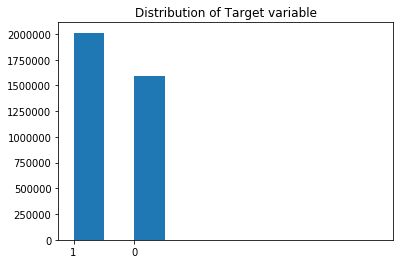

In [105]:
# Look for Dist of Target variable 
plt.hist(target, range=[0, 5])
plt.title('Distribution of Target variable')

In [123]:
# save numeric and categorical variables into seperate objects
num_cols=dataset.select_dtypes(include=[np.number])
char_cols=dataset.select_dtypes(include=[np.object])
char_cols=char_cols.drop(['target'],axis=1)
print(num_cols,char_cols)

         account_tenure_mons  price  acct_app_cnt
0                       61.0   9.99           121
1                       96.0   1.99           127
2                       80.0   1.99           112
3                       65.0   9.99           122
4                       19.0   0.00            70
...                      ...    ...           ...
3605239                 -5.0   0.00            64
3605240                 81.0  25.99           124
3605241                 49.0   0.00           121
3605242                 43.0   0.00            64
3605243                 87.0  23.99           119

[3605244 rows x 3 columns]         device_name    category_name payment_type trans_dow
0            iPhone            Games         PMOF         1
1            iPhone        Utilities         PMOF         6
2            iPhone  Photos & Videos         PMOF         3
3              iPad            Games         PMOF         3
4            iPhone        Utilities    Free only         5
...         

In [124]:
# save numeric and categorical column names in to seperate list
num_vars=[feature for feature in num_cols]
char_vars=[feature for feature in char_cols]
print(num_vars,char_vars)

['account_tenure_mons', 'price', 'acct_app_cnt'] ['device_name', 'category_name', 'payment_type', 'trans_dow']


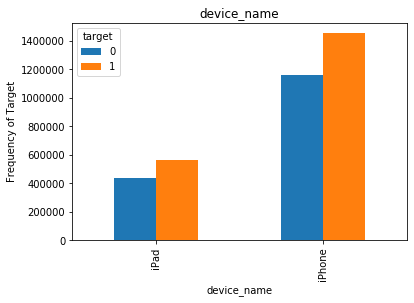

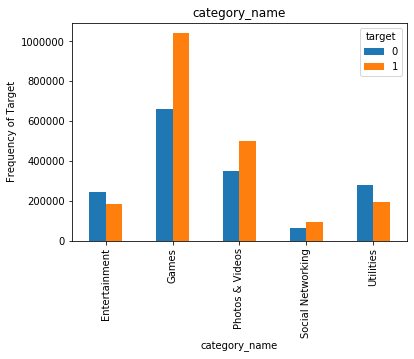

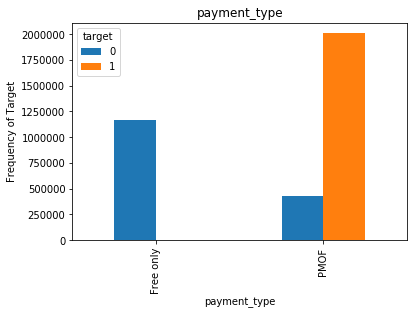

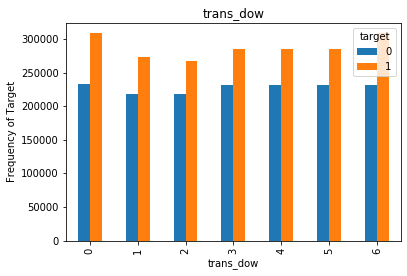

In [125]:
#plot all the categorical variables against the target variable to understand the distribution
%matplotlib inline
for feature in char_vars:
    pd.crosstab(dataset[feature],dataset['target']).plot(kind='bar')
    plt.title(feature)
    plt.xlabel(feature)
    plt.ylabel('Frequency of Target')
# plt.savefig('purchase_fre_job')

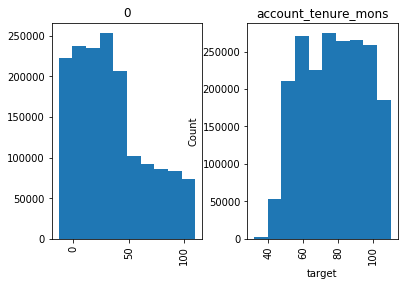

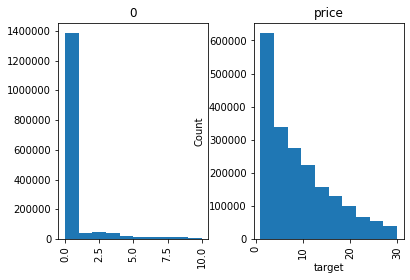

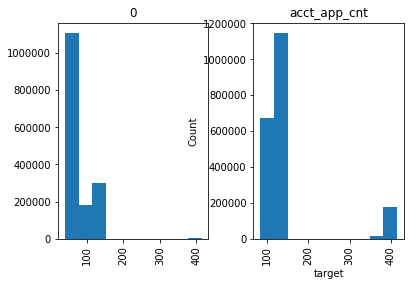

In [126]:
#Visualize the distribution of each numeric variable by target response to check for any observations 
for feature in num_vars:
    dataset[feature].hist(by=dataset['target'])
    plt.xlabel('target')
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

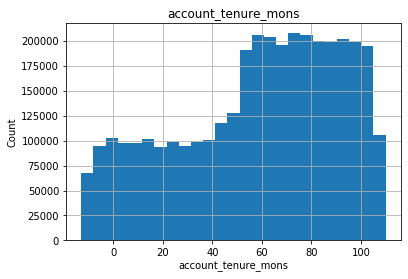

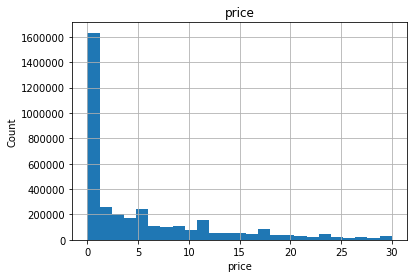

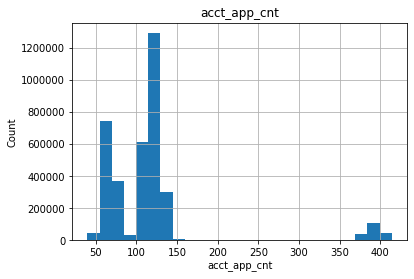

In [127]:
#Visualize Distribution of all Numerical variables:
for feature in num_vars:
    data_cp=dataset.copy()
    data_cp[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.title(feature)
    plt.show()

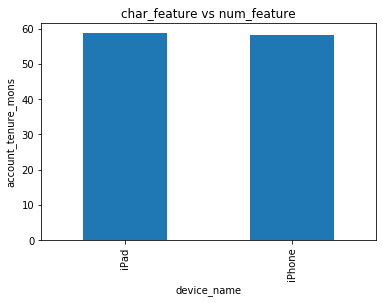

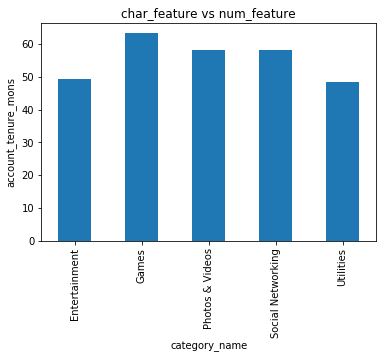

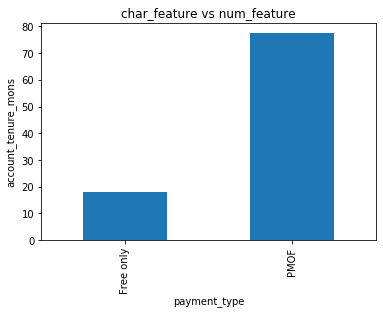

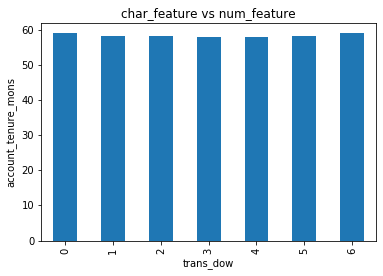

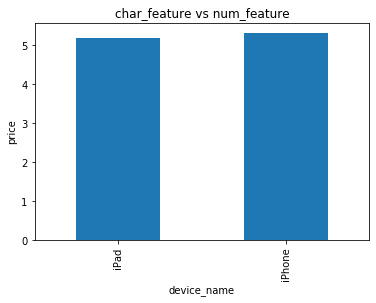

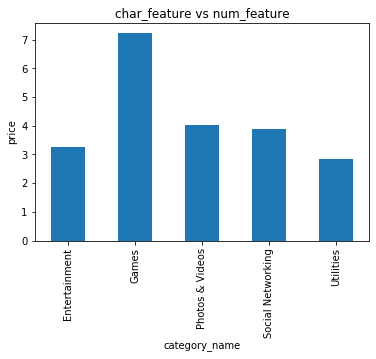

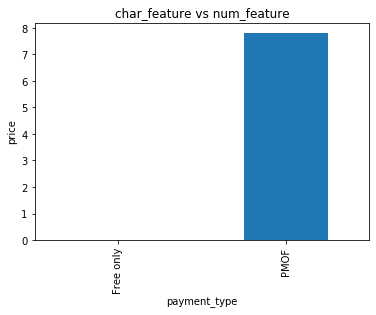

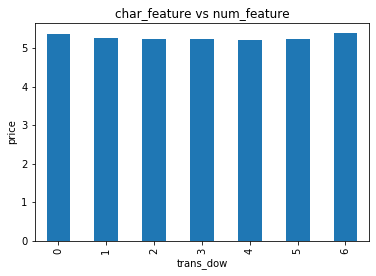

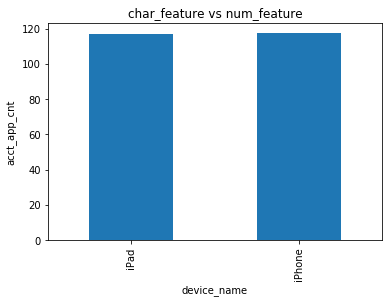

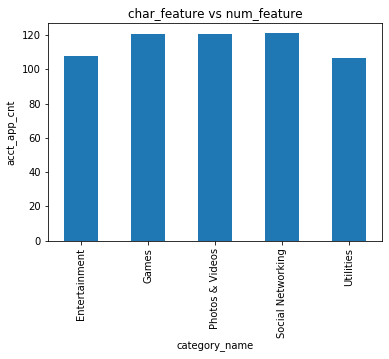

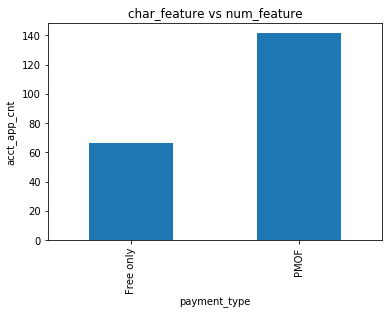

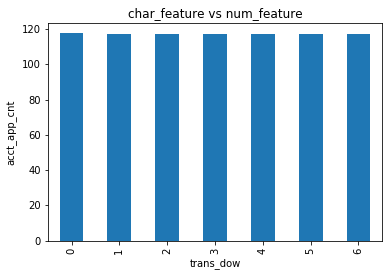

In [128]:
#Visualize the Relation between categorical and numeric independent variables
for num_feature in num_vars:
    for char_feature in char_vars:
        data_cp.groupby(char_feature)[num_feature].mean().plot.bar()
        plt.xlabel(char_feature)
        plt.ylabel(num_feature)
        plt.title('char_feature vs num_feature')
        plt.show()

,account_tenure_mons,price,acct_app_cnt
account_tenure_mons,1.000000,0.442162,0.420667
price,0.442162,1.000000,0.276949
acct_app_cnt,0.420667,0.276949,1.000000


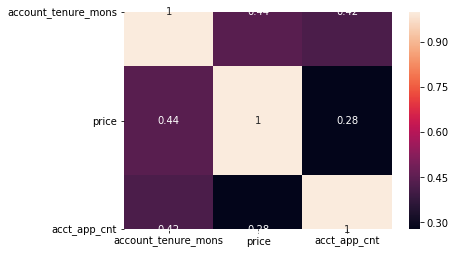

In [129]:
#check for correlation among all the input numeric variables to make sure we are not violating the assumptions of logistic regression
#correlation Matrix - we dont see any 2 variables being highly correlated
corr=dataset.corr()
sns.heatmap(corr, annot=True)
corr.abs()

In [130]:
# check for the null values in the data set. 
# we have 2,741 trasactions as NULLS because 25 accounts that had a transaction were not found in account_dat.csv file
dataset.isnull().sum()

account_tenure_mons    2741
price                     0
acct_app_cnt              0
device_name               0
category_name             0
payment_type           2741
trans_dow                 0
target                    0
dtype: int64

In [131]:

#  Handle Missing Values
dataset1=dataset.copy()

# Numeric Imputation for account_tenure_mons column using mean
dataset1['account_tenure_mons'].fillna(dataset1['account_tenure_mons'].mean(), inplace = True)

# Categorical Imputation for payment_type column by categorizing them as "Missing"
dataset1["payment_type"].fillna("Missing", inplace = True)

# we dont have any more nulls in the dataset
# dataset1.isnull().sum()
dataset1.dtypes

account_tenure_mons    float64
price                  float64
acct_app_cnt             int64
device_name             object
category_name           object
payment_type            object
trans_dow               object
target                  object
dtype: object

In [133]:
# create dummy variables for categorical variables to be able to use them in the logistic regression
dataset2= pd.get_dummies(data=dataset1,columns=char_vars, drop_first=False)
binned_vars=[feature for feature in dataset2 if len(dataset2[feature].unique())<=2 ]
binned_vars.remove('target')
# remove the below binary variables because we dont need them
binned_vars.remove('category_name_Utilities')
binned_vars.remove('device_name_iPad')
binned_vars.remove('payment_type_Missing')
binned_vars.remove('trans_dow_1')
binned_vars.remove('trans_dow_2')
binned_vars.remove('trans_dow_3')
binned_vars.remove('trans_dow_4')
binned_vars.remove('trans_dow_5')
binned_vars

['device_name_iPhone',
 'category_name_Entertainment',
 'category_name_Games',
 'category_name_Photos & Videos',
 'category_name_Social Networking',
 'payment_type_Free only',
 'payment_type_PMOF',
 'trans_dow_0',
 'trans_dow_6']

In [134]:
#split the data set into training (70%) and testing (30%) datasets 

columns=num_vars + binned_vars 
dataset_model = pd.DataFrame(dataset2,columns=columns)
y=dataset2.target
X_train, X_test, y_train, y_test = train_test_split(dataset_model, y, test_size=0.3)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(2523670, 12) (2523670,)
(1081574, 12) (1081574,)


In [135]:
# Build Logistic Regression Model and summarize the results
logit_model=sm.Logit(y_train.astype(float),X_train.astype(float))
logit_model
result=logit_model.fit()
print(result.summary2())

         Current function value: 0.235127
         Iterations: 35


/Users/bmolaka/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                                   Results: Logit
Model:                     Logit                 Pseudo R-squared:      0.657       
Dependent Variable:        target                AIC:                   1186790.7077
Date:                      2021-10-28 06:59      BIC:                   1186943.6024
No. Observations:          2523670               Log-Likelihood:        -5.9338e+05 
Df Model:                  11                    LL-Null:               -1.7320e+06 
Df Residuals:              2523658               LLR p-value:           0.0000      
Converged:                 0.0000                Scale:                 1.0000      
No. Iterations:            35.0000                                                  
------------------------------------------------------------------------------------
                                 Coef.   Std.Err.    z     P>|z|    [0.025   0.975] 
------------------------------------------------------------------------------------
account_tenure_

In [136]:
# Out the Odds Ratios (with confidence intervals) for each input column to get insights and interpret the model output 
params = result.params
conf = result.conf_int()
conf['Odds Ratio'] = params
conf.columns = ['5%', '95%', 'Odds Ratio']
conf_odds=print(np.exp(conf))
conf_odds

                                            5%            95%    Odds Ratio
account_tenure_mons               9.986504e-01   9.991529e-01  9.989016e-01
price                             1.383632e+00   1.388133e+00  1.385881e+00
acct_app_cnt                      1.007627e+00   1.007869e+00  1.007748e+00
device_name_iPhone                8.730126e-01   8.906308e-01  8.817777e-01
category_name_Entertainment       1.062918e+00   1.103980e+00  1.083254e+00
category_name_Games               6.654177e-01   6.847345e-01  6.750070e-01
category_name_Photos & Videos     1.715966e+00   1.772661e+00  1.744083e+00
category_name_Social Networking   1.786414e+00   1.881856e+00  1.833514e+00
payment_type_Free only           2.084302e-155  3.037169e+133  2.516024e-11
payment_type_PMOF                 4.656591e-01   4.935035e-01  4.793792e-01
trans_dow_0                       1.044580e+00   1.071521e+00  1.057965e+00
trans_dow_6                       1.057572e+00   1.084959e+00  1.071178e+00


In [137]:
#Fit the model on the training data set for prediction purposes
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Users/bmolaka/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
# Calculate the accuracy of the model
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.91


In [138]:
# Output the confusion matrix based on the actuals and predictions from the model
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[181073 297531]
 [227709 375261]]


In [139]:
# Output the model evaluation metrics like accuracy, precision, recall, F1 score using above confusion matrix
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.44      0.38      0.41    478604
           1       0.56      0.62      0.59    602970

    accuracy                           0.51   1081574
   macro avg       0.50      0.50      0.50   1081574
weighted avg       0.51      0.51      0.51   1081574



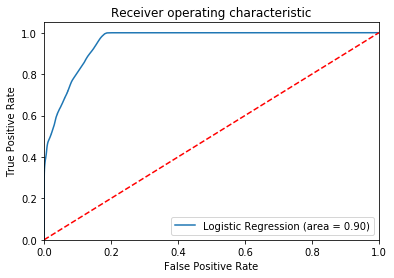

In [141]:
# Plot the Roc curve using the above stats along with the AUC(Area under the curve) metric
logit_roc_auc = roc_auc_score(y_test.astype(float), logreg.predict(X_test).astype(float))
fpr, tpr, thresholds = roc_curve(y_test.astype(float), logreg.predict_proba(X_test.astype(float))[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

## Please refer to the power point presentation for detailed explanation and interpretation of this model output